In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(0,799, 800)

In [3]:
y = torch.sin(x*2*3.1416/40)

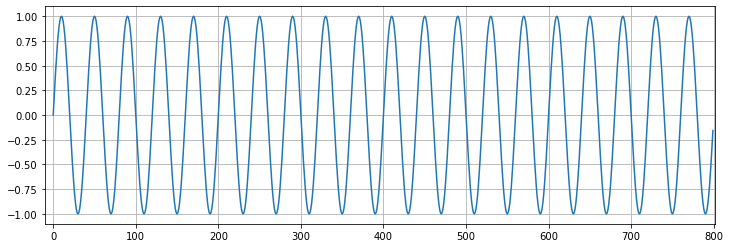

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [5]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

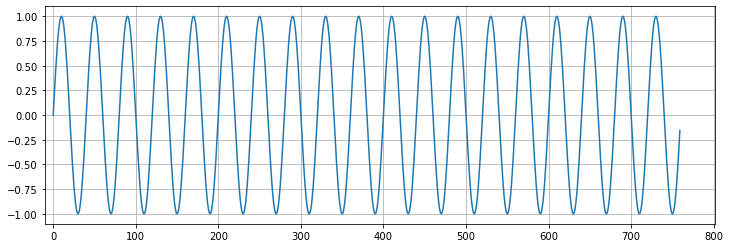

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

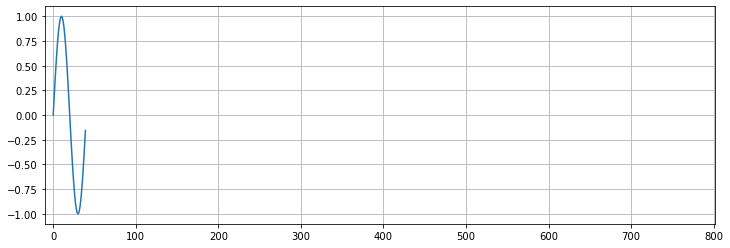

In [7]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(test_set.numpy())

In [8]:
def input_data(seq, ws):
    
    out = [] #([0,1,2,3], [4])
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [9]:
window_size = 40

train_data = input_data(train_set, window_size)

In [10]:
len(train_data)

720

In [11]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [12]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

In [13]:
class LSTM(nn.Module):
    # hidden size - how many neurons inside lstm layer
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
            
        self.lstm = nn.LSTM(input_size, hidden_size)
            
        #now we have a layer 50 LSTM neurons and we have to condense back down to 1 single output
        self.linear = nn.Linear(hidden_size, out_size)
            
        #hidden state and self state (H, C)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))
            
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq), -1))
        
        #[1,2,3] [4] ---> [1,2,3,4 ---> 4]
        return pred[-1]

In [14]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [15]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [16]:
for param in model.parameters():
    print(param.numel())

200
10000
200
200
50
1


In [17]:
#last window
train_set[-window_size:].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422035455703735,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 1.0,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch: 1 Loss: 0.0022917576134204865
Performance on test range: 0.5043660402297974


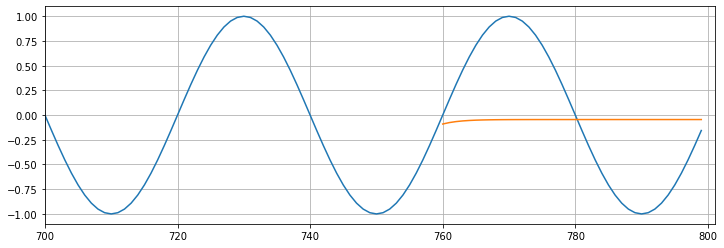

Epoch: 2 Loss: 0.0005030849715694785
Performance on test range: 0.5092830657958984


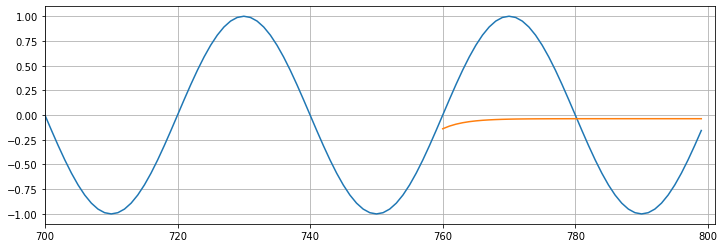

Epoch: 3 Loss: 0.01564094051718712
Performance on test range: 0.5279306769371033


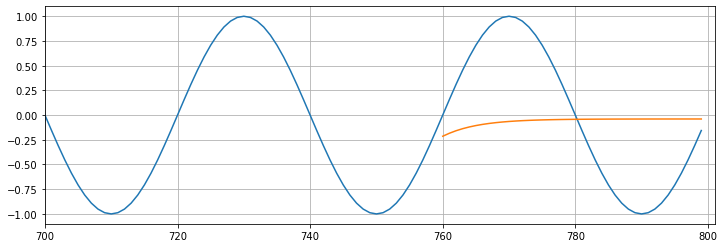

Epoch: 4 Loss: 0.0484953373670578
Performance on test range: 0.5681353807449341


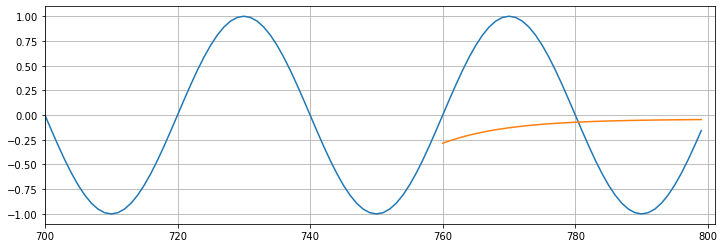

Epoch: 5 Loss: 0.07737552374601364
Performance on test range: 0.6038271188735962


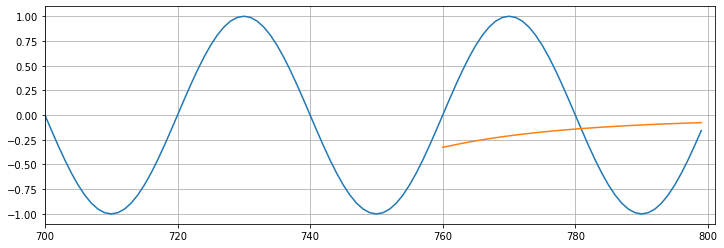

Epoch: 6 Loss: 0.09165358543395996
Performance on test range: 0.6156729459762573


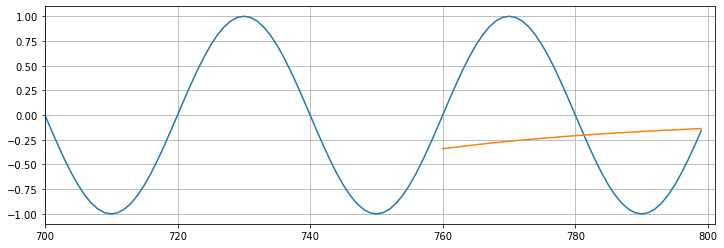

Epoch: 7 Loss: 0.09571436047554016
Performance on test range: 0.6162710785865784


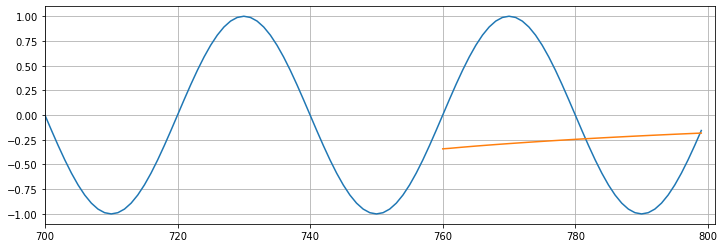

Epoch: 8 Loss: 0.09504737704992294
Performance on test range: 0.6133379340171814


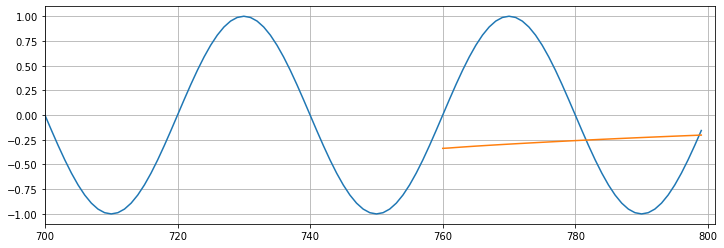

Epoch: 9 Loss: 0.09255652874708176
Performance on test range: 0.609329104423523


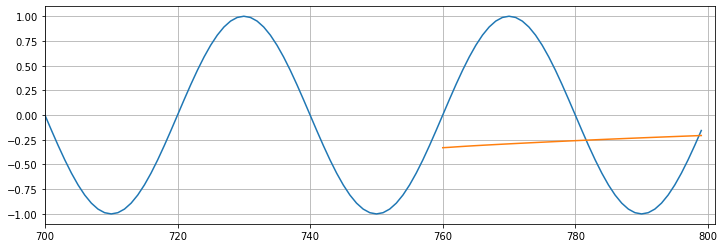

Epoch: 10 Loss: 0.08946509659290314
Performance on test range: 0.6051582098007202


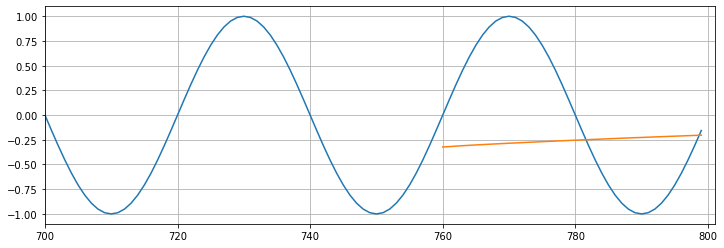

Epoch: 11 Loss: 0.08624684810638428
Performance on test range: 0.6011538505554199


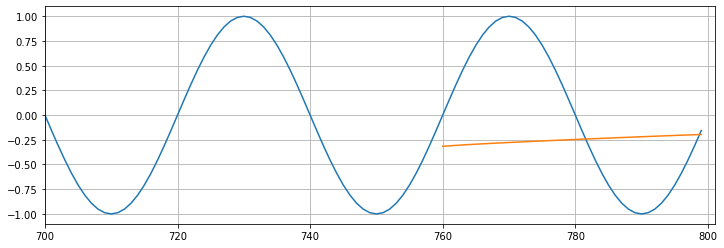

Epoch: 12 Loss: 0.08307486772537231
Performance on test range: 0.5974141359329224


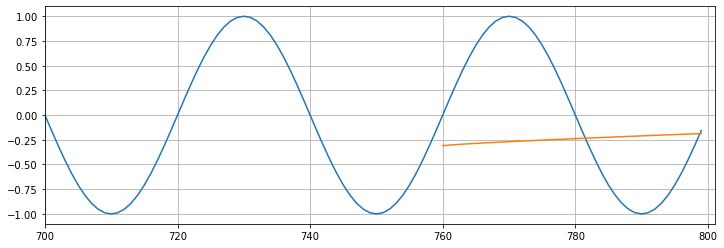

Epoch: 13 Loss: 0.08000462502241135
Performance on test range: 0.5939558744430542


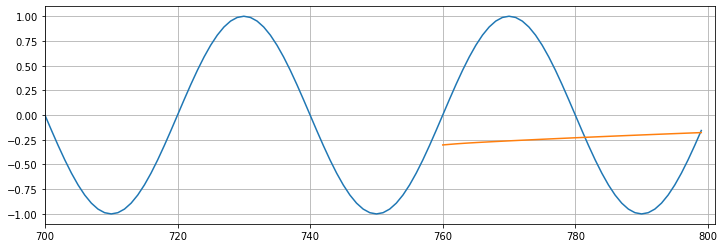

Epoch: 14 Loss: 0.07704724371433258
Performance on test range: 0.590770959854126


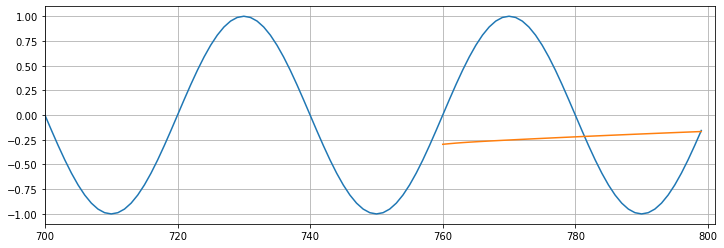

Epoch: 15 Loss: 0.07419626414775848
Performance on test range: 0.5878461599349976


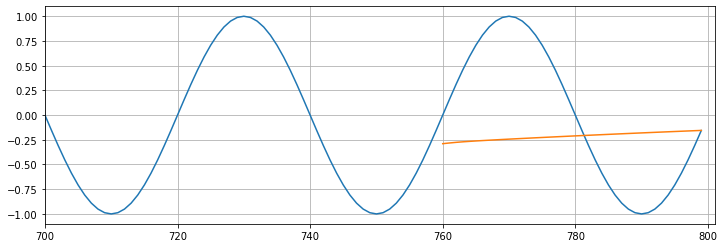

In [18]:
EPOCHS = 15
future = 40

for i in range(EPOCHS):
    
    for seq,y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch: {i+1} Loss: {loss.item()}")
   


    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()

In [19]:
EPOCHS = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)
len(all_data)

760

In [20]:
import time
start_time = time.time()

for i in range(EPOCHS):
    
    for seq,y_train in all_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch: {i+1} Loss: {loss.item()}")


total_time = time.time() - start_time
print(total_time/60)

Epoch: 1 Loss: 0.0712902843952179
Epoch: 2 Loss: 0.06847193092107773
Epoch: 3 Loss: 0.0657263770699501
Epoch: 4 Loss: 0.06303855031728745
Epoch: 5 Loss: 0.06039448082447052
Epoch: 6 Loss: 0.057781413197517395
Epoch: 7 Loss: 0.05518818274140358
Epoch: 8 Loss: 0.05260498449206352
Epoch: 9 Loss: 0.050023410469293594
Epoch: 10 Loss: 0.04743664711713791
Epoch: 11 Loss: 0.044839926064014435
Epoch: 12 Loss: 0.04223001375794411
Epoch: 13 Loss: 0.039606403559446335
Epoch: 14 Loss: 0.036970995366573334
Epoch: 15 Loss: 0.034328460693359375
1.2146164218584696


## Forecast into unknown future

In [22]:
preds = y[-window_size:].tolist()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

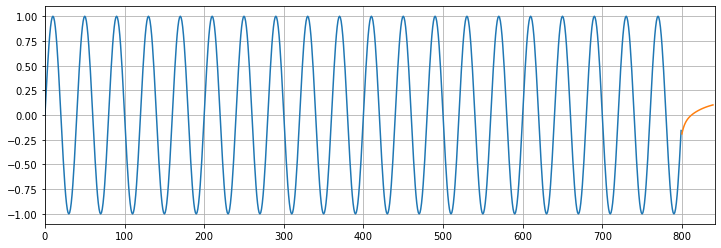

In [24]:
plt.figure(figsize=(12,4))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
#Plotting forecast
plt.plot(range(800,800+future), preds[window_size:])
plt.show()

In [ ]:
()